In [135]:
from model.model4 import Model4,build_model4
from model.utils import get_model, save_checkpoint, load_checkpoint
from PIL import Image
import yaml
import numpy as np
img_all = Image.open(r"C:\\Users\\phamp\\Desktop\\module_space\\testimg\\all_1.jpg") 
img_all = img_all.convert("RGB")
img = Image.open(r"C:\\Users\\phamp\\Desktop\\module_space\\testimg\\2.jpg") 
img = img.convert("RGB")

def yaml_to_dict(path: str):
    with open(path) as f:
        return yaml.load(f.read(), yaml.FullLoader)
config = yaml_to_dict(".\\configs\\train_mot17_coco.yaml")
config["DATA_ROOT"]="D:\\Thesis\\DamnShit\\Hello\\MeMOTR_IKUN\\DATA_DIR"
config["TRAIN_COCO"]="D:\\Thesis\\DamnShit\\Hello\\MeMOTR_IKUN\\outputs\\memotr_mot17_coco\\train\\mot17_train_coco_reforged.json"
config["NO_TRANSFORM"]=True
config["EPOCHS"]=10
config["RESUME"]="C:\\Users\\phamp\\Desktop\\module_space\\131_499.pth"

model = build_model4(config=config)
train_states = {
        "start_epoch": 0,
        "global_iters": 0
    }

# Resume
load_checkpoint(model=model, path=config["RESUME"])


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Checkpoint is loaded from C:\Users\phamp\Desktop\module_space\131_499.pth.


In [137]:
config["test_bs"]=1
config["num_workers"]=4
config["img_hw"]=[(224, 224), (448, 448), (672, 672)]
config["random_crop_ratio"]=[0.8, 1.0]
config["norm_mean"]=[0.48145466, 0.4578275, 0.40821073]
config["norm_std"]=[0.26862954, 0.26130258, 0.27577711]
import torch
from data.dataloader import get_transform

transform =  {idx: get_transform("test", config, idx) for idx in (0, 1, 2)}

In [148]:
sentences=["blue "]
x={
    "local_images":[img],
    # "global_image":img_all,
    "sentences":sentences
}

In [149]:
x['local_images']= torch.stack(
        [transform[0](
            img
        ) for img in x['local_images'] ],
        dim=0
    ).unsqueeze(1)

In [150]:
model.eval()
out=model(x)


In [151]:
out


{'logits': tensor([0.0098], device='cuda:0', grad_fn=<DivBackward0>)}

['blue ']
tensor([True], device='cuda:0')


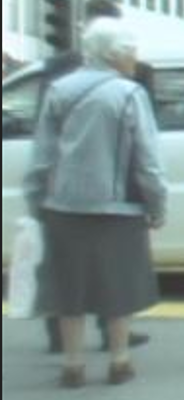

In [152]:
print(sentences)
print(out['logits'] >0 )
img